In [1]:
# importing libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### As we tend to solve this problem statement using Regression, we will drop following columns:
 Day<br>
 month<br>
 year<br>

### We will compute FWI based on other feature columns
### FWI: Fire Weather Index,  it is a numeric rating of fire intensity.

In [3]:
df.drop(['day','month', 'year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [5]:
# Encode the values in class coulmn, so we only have 2 classes

df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [6]:
# df.iloc[200:240]
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [7]:
X= df.drop("FWI", axis=1)
y = df['FWI']

In [8]:
# Train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [9]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

### Feature Selection

Based on correlation

In [10]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

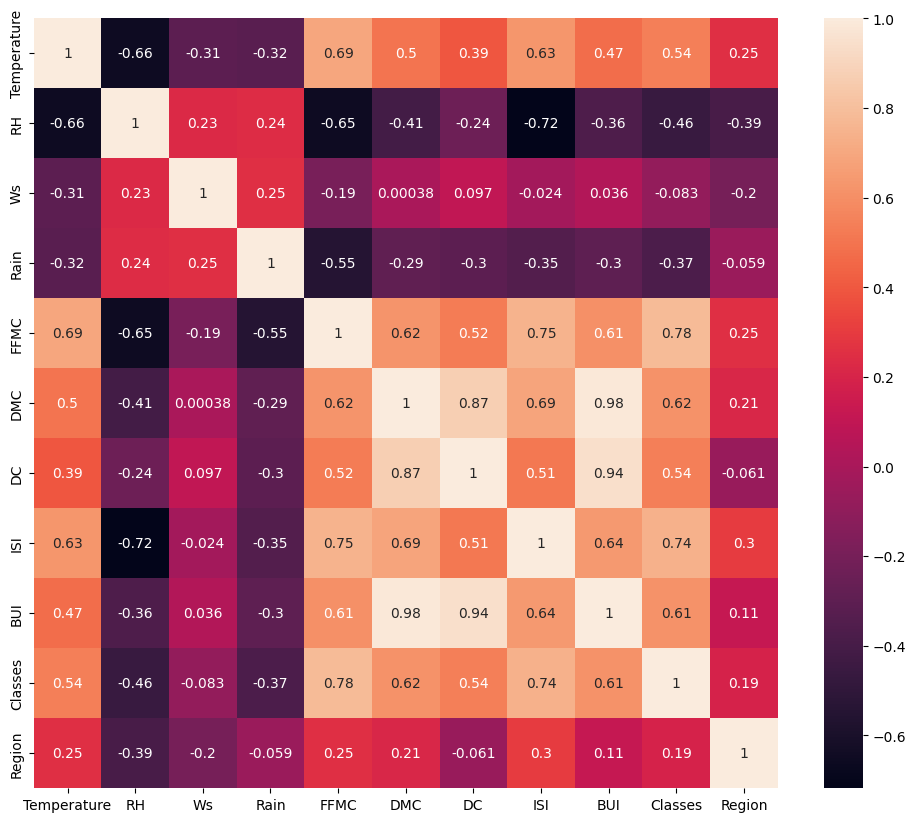

In [11]:
#check multicollinearity

plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

### From the graph, it can be infered that following feature pairs have very high correlation:

#### DMC-BUI
#### DC-BUI

In [12]:
# extracting features with correlation higher that threshold value
def correlation(dataset, threshold):
    col_corr = set() # to select only unique features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(X_train, 0.85)

In [14]:
# dropping features with correlation more than .85

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Feature Scaling

### Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_23556\159674895.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_tain after Scaling')

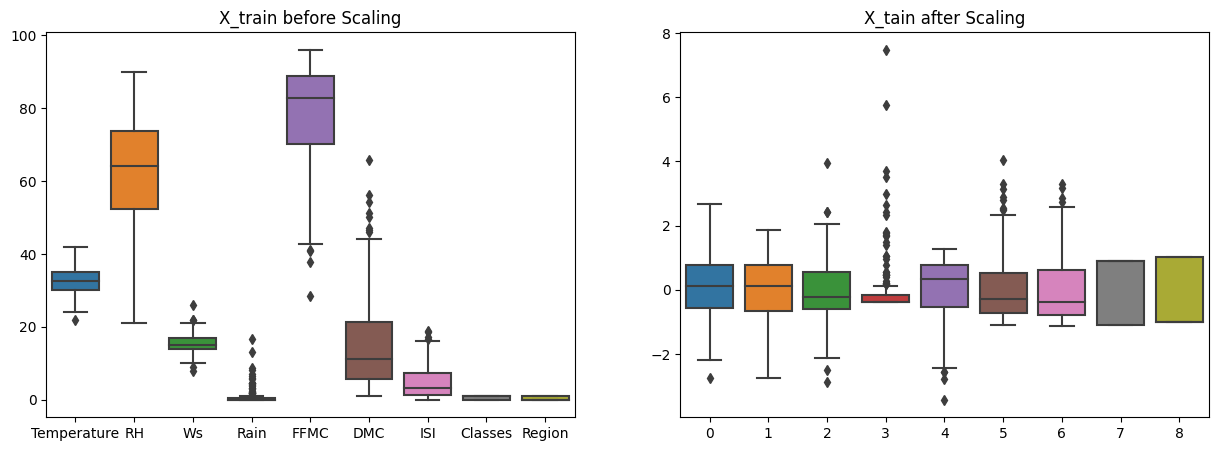

In [16]:
# Compare how features and outliers are mapped before and after scaling

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_tain after Scaling')

### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r_score = r2_score(y_test, y_pred)

print("Mean absolute error: ", mae)
print("R2 Score: ", r_score)

Mean absolute error:  0.546823646524997
R2 Score:  0.9847657384266951


### We achieved a mean absolute error of 0.54, which indicates, model needs to be tuned further to reduce the error 

### R2 score of 0.98 indicates the model is abel to capture the varience in data 

Text(0.5, 1.0, 'Linear Regression')

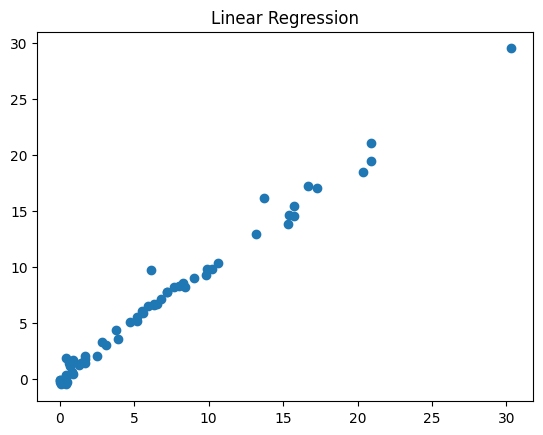

In [38]:
plt.scatter(y_test, y_pred)
plt.title("Linear Regression")

### Parameter tuning

### Lasso Regression

In [21]:
from sklearn.linear_model import Lasso, LassoCV

las = Lasso()
las.fit(X_train_scaled, y_train)

y_pred_las = las.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_las)
r_score = r2_score(y_test, y_pred_las)

print("Mean absolute error: ", mae)
print("R2 Score: ", r_score)

Mean absolute error:  1.133175994914409
R2 Score:  0.9492020263112388


Text(0.5, 1.0, 'Lasso Regression')

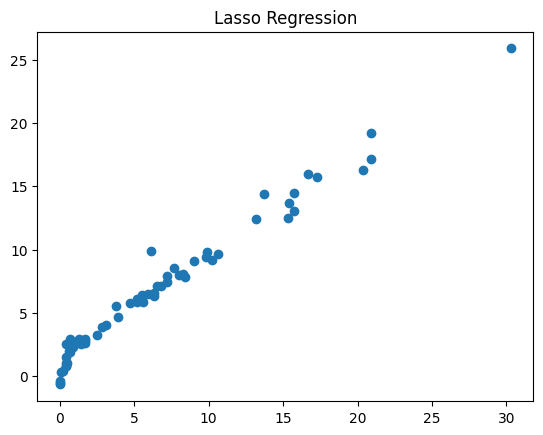

In [37]:
plt.scatter(y_test, y_pred_las)
plt.title("Lasso Regression")

In [23]:
lascv = LassoCV(cv=5)
lascv.fit(X_train_scaled, y_train)
y_pred_lascv = lascv.predict(X_test_scaled)

Mean absolute error:  0.6199701158263433
R2 Score:  0.9820946715928275


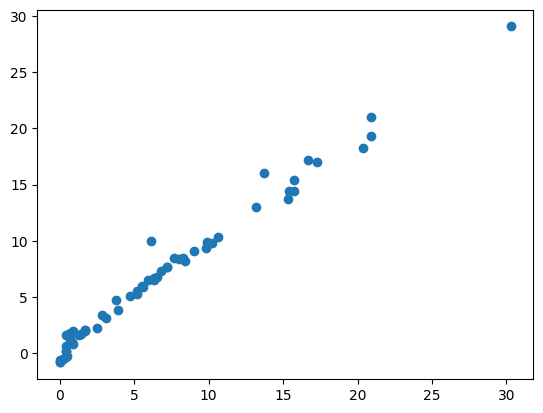

In [24]:
plt.scatter(y_test,y_pred_lascv)

mae = mean_absolute_error(y_test, y_pred_lascv)
r_score = r2_score(y_test, y_pred_lascv)

print("Mean absolute error: ", mae)
print("R2 Score: ", r_score)

### Ridge Regression 

In [25]:
from sklearn.linear_model import Ridge, RidgeCV

rig = Ridge()
rig.fit(X_train_scaled, y_train)

y_pred_rig = rig.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_rig)
r_score = r2_score(y_test, y_pred_rig)

print("Mean absolute error: ", mae)
print("R2 Score: ", r_score)

Mean absolute error:  0.5642305340105708
R2 Score:  0.9842993364555513


Text(0.5, 1.0, 'Ridge')

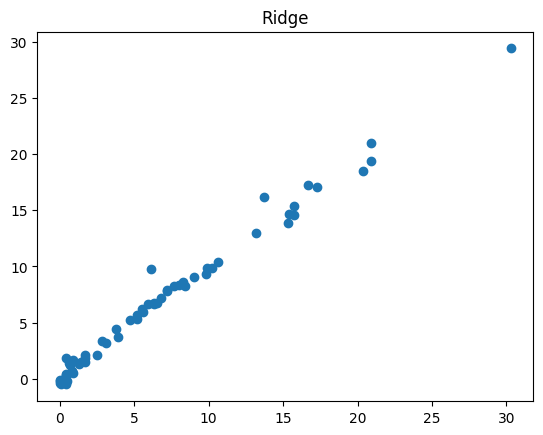

In [39]:
plt.scatter(y_test, y_pred_rig)
plt.title("Ridge")

In [27]:
rigcv = RidgeCV(cv=5)
rigcv.fit(X_train_scaled, y_train)
y_pred_rigcv = rigcv.predict(X_test_scaled)

Mean absolute error:  0.5642305340105708
R2 Score:  0.9842993364555513


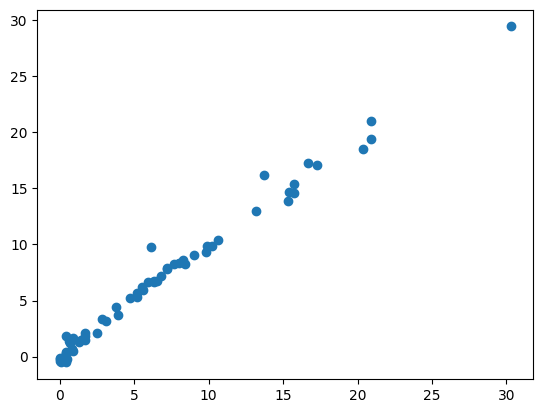

In [28]:
plt.scatter(y_test,y_pred_rigcv)

mae = mean_absolute_error(y_test, y_pred_rigcv)
r_score = r2_score(y_test, y_pred_rigcv)

print("Mean absolute error: ", mae)
print("R2 Score: ", r_score)

In [30]:
# check the parameters used

rigcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Linear Regression
Mean absolute error:  0.546823646524997<br>
R2 Score:  0.9847657384266951

### Ridge Regression
Mean absolute error:  0.5642305340105708 <br>
R2 Score:  0.9842993364555513

### Lasso Regression
Mean absolute error:  1.133175994914409 <br>
R2 Score:  0.9492020263112388

## We will use Elastic net to combine both Ridge and Lasso Regression

## Elastic Net Regularization

In [31]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

eln = ElasticNet()
eln.fit(X_train_scaled, y_train)

y_pred_eln = eln.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_eln)
r_score = r2_score(y_test, y_pred_eln)

print("Mean absolute error: ", mae)
print("R2 Score: ", r_score)

Mean absolute error:  1.8822353634896
R2 Score:  0.8753460589519703


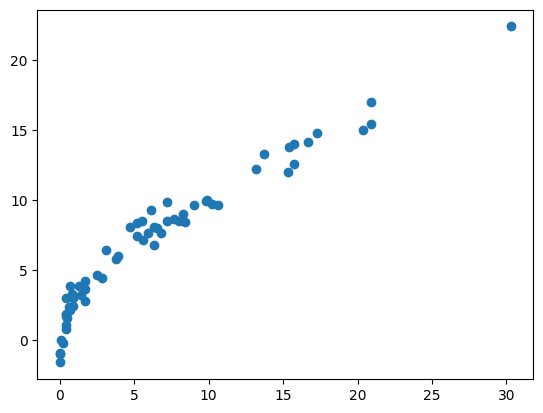

In [51]:
plt.scatter(y_test, y_pred_eln)

In [32]:
elncv = ElasticNetCV(cv=5)
elncv.fit(X_train_scaled, y_train)
y_pred_elncv = elncv.predict(X_test_scaled)

Mean absolute error:  0.6575946731430901
R2 Score:  0.9814217587854941


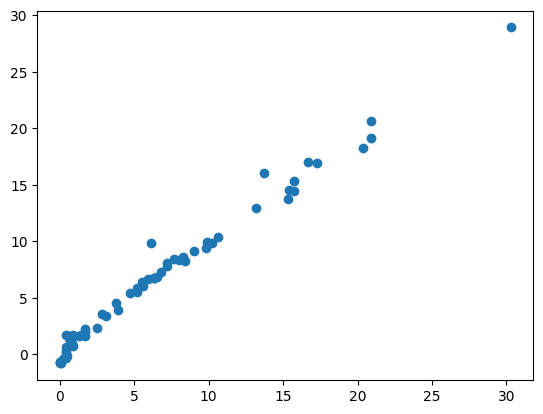

In [33]:
plt.scatter(y_test,y_pred_elncv)

mae = mean_absolute_error(y_test, y_pred_elncv)
r_score = r2_score(y_test, y_pred_elncv)

print("Mean absolute error: ", mae)
print("R2 Score: ", r_score)

In [34]:
elncv.alphas_

array([1.41170600e+01, 1.31656174e+01, 1.22782989e+01, 1.14507826e+01,
       1.06790382e+01, 9.95930678e+00, 9.28808283e+00, 8.66209714e+00,
       8.07830078e+00, 7.53385034e+00, 7.02609405e+00, 6.55255882e+00,
       6.11093829e+00, 5.69908150e+00, 5.31498248e+00, 4.95677045e+00,
       4.62270071e+00, 4.31114616e+00, 4.02058933e+00, 3.74961507e+00,
       3.49690356e+00, 3.26122397e+00, 3.04142839e+00, 2.83644629e+00,
       2.64527931e+00, 2.46699633e+00, 2.30072904e+00, 2.14566760e+00,
       2.00105679e+00, 1.86619226e+00, 1.74041714e+00, 1.62311885e+00,
       1.51372607e+00, 1.41170600e+00, 1.31656174e+00, 1.22782989e+00,
       1.14507826e+00, 1.06790382e+00, 9.95930678e-01, 9.28808283e-01,
       8.66209714e-01, 8.07830078e-01, 7.53385034e-01, 7.02609405e-01,
       6.55255882e-01, 6.11093829e-01, 5.69908150e-01, 5.31498248e-01,
       4.95677045e-01, 4.62270071e-01, 4.31114616e-01, 4.02058933e-01,
       3.74961507e-01, 3.49690356e-01, 3.26122397e-01, 3.04142839e-01,
      